In [2]:
%load_ext autoreload
%cd /mnt/hdd_2/abdu/gtex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

/mnt/hdd_2/abdu/gtex


### Adipose Subcutaneous Tissue (GTEx)

In [2]:
import pickle
gene_symbol_ensembl_id = pickle.load(open("/home/abdu/bio_ai/code/biocypher-metta/aux_files/hgnc_to_ensembl.pkl", "rb"))
ensembl_id_gene_symbol = pickle.load(open("/home/abdu/bio_ai/code/biocypher-metta/aux_files/ensembl_to_hgnc.pkl", "rb"))

In [2]:
gene_tpm_count_df = pd.read_table("/mnt/hdd_2/abdu/gtex/gene_tpm_2017-06-05_v8_adipose_subcutaneous.gct", skiprows=2)
gene_tpm_count_df["Name"] = gene_tpm_count_df["Name"].apply(lambda x: x.split(".")[0])
gene_tpm_count_df = gene_tpm_count_df.drop(columns=["Description", "id"])
gene_tpm_count_df = gene_tpm_count_df.set_index("Name")
gene_expr_df = np.log2(gene_tpm_count_df + 1)
print("Number of genes: ", gene_expr_df.shape[0])
gene_expr_df.head()

Number of genes:  56200


,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-9YFMG,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,...,GTEX-ZXES-2026-SM-5NQ6R,GTEX-ZXG5-0226-SM-59HJI,GTEX-ZYFC-0326-SM-5NQ7H,GTEX-ZYFD-0226-SM-5NQ86,GTEX-ZYT6-0326-SM-7LG5R,GTEX-ZYVF-0226-SM-5GIEG,GTEX-ZYW4-0226-SM-5E44M,GTEX-ZYY3-0226-SM-5E45M,GTEX-ZZ64-1626-SM-5E43W,GTEX-ZZPU-2726-SM-5NQ8O
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044184,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035905
ENSG00000227232,3.287472,2.029276,2.378512,2.070733,2.037734,1.851999,2.353606,2.531818,1.759156,1.973795,...,1.987685,2.733137,3.36247,2.771463,2.248231,1.931305,1.362891,2.434562,2.378789,1.663117
ENSG00000278267,0.000000,0.000000,0.000000,0.668845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000243485,0.100170,0.000000,0.059078,0.000000,0.000000,0.039560,0.000000,0.087055,0.000000,0.000000,...,0.067501,0.000000,0.00000,0.000000,0.059355,0.000000,0.086512,0.071488,0.071900,0.000000
ENSG00000237613,0.000000,0.000000,0.000000,0.000000,0.052694,0.000000,0.000000,0.062398,0.048515,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.067501,0.000000,0.000000,0.000000,0.000000


### White Pre-Adipocytes (CellxGene)

In [66]:
import anndata as ad
white_pre_adipocytes = ad.read_h5ad("/mnt/hdd_2/abdu/gtex/white_preadipocytes_sc_exp.h5ad")
white_pre_adipocytes_df = white_pre_adipocytes.to_df()

In [67]:
ensembl_id_gene_symbol = {}
gene_symbol_ensembl_id = {}
for gene_id in white_pre_adipocytes.var.index:
    gene_symbol = white_pre_adipocytes.var.loc[gene_id, "feature_name"]
    ensembl_id_gene_symbol[gene_id] = gene_symbol
    gene_symbol_ensembl_id[gene_symbol] = gene_id

In [68]:
irx3_id = gene_symbol_ensembl_id["IRX3"]
irx5_id = gene_symbol_ensembl_id["IRX5"]
mean_irx3_expr = white_pre_adipocytes_df[irx3_id].mean()
mean_irx5_expr = white_pre_adipocytes_df[irx5_id].mean()
#Num of cells with non-zero expression (percent)
num_irx3_cells = white_pre_adipocytes_df[white_pre_adipocytes_df[irx3_id] > 0.0].shape[0]
num_irx5_cells = white_pre_adipocytes_df[white_pre_adipocytes_df[irx5_id] > 0.0].shape[0]
print(f"IRX3: Mean expr - {mean_irx3_expr: .3f}\t % of Cells - {num_irx3_cells/white_pre_adipocytes_df.shape[0]*100:.3f}")
print(f"IRX5: Mean expr - {mean_irx5_expr: .3f}\t % of Cells - {num_irx5_cells/white_pre_adipocytes_df.shape[0]*100:.3f}")

IRX3: Mean expr -  0.150	 % of Cells - 19.586
IRX5: Mean expr -  0.035	 % of Cells - 5.770


In [69]:
from tqdm import tqdm
white_pady_irx3_corrs = {"gene": [], "corr": [], "pval": []}
white_pady_irx5_corrs = {"gene": [], "corr": [], "pval": []}
irx3_id = gene_symbol_ensembl_id["IRX3"]
irx5_id = gene_symbol_ensembl_id["IRX5"]
white_pady_irx3_expr = white_pre_adipocytes_df[irx3_id].values
white_pady_irx5_expr = white_pre_adipocytes_df[irx5_id].values
for gene_id in tqdm(white_pre_adipocytes_df.columns):
    gene_expr_val = white_pre_adipocytes_df[gene_id].values
    if len(gene_expr_val.shape) > 1: # for duplicate gene ids take the first one
        gene_expr_val = gene_expr_val[0] 
    try:
        if gene_id != irx3_id:
            irx3_corr, irx3_pval = stats.pearsonr(gene_expr_val, white_pady_irx3_expr)
            white_pady_irx3_corrs["gene"].append(ensembl_id_gene_symbol[gene_id])
            white_pady_irx3_corrs["corr"].append(irx3_corr)
            white_pady_irx3_corrs["pval"].append(irx3_pval)
        if gene_id != irx5_id:
            irx5_corr, irx5_pval = stats.pearsonr(gene_expr_val, white_pady_irx5_expr)
            white_pady_irx5_corrs["gene"].append(ensembl_id_gene_symbol[gene_id])
            white_pady_irx5_corrs["corr"].append(irx5_corr)
            white_pady_irx5_corrs["pval"].append(irx5_pval)
    except Exception as e:
        print(f"Exception: {e}")
        print(f"Gene id: {gene_id}")
        print(f"Gene expr val: {len(gene_expr_val)}")
        print(f"IRX3 expr val: {len(white_pady_irx3_expr)}")
        print(f"IRX5 expr val: {len(white_pady_irx5_expr)}")

  0%|                                                                                                                    | 0/33234 [00:00<?, ?it/s]/home/abdu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 33234/33234 [03:56<00:00, 140.45it/s]


In [71]:
white_padpy_irx3_corrs_df = pd.DataFrame(white_pady_irx3_corrs)
white_padpy_irx5_corrs_df = pd.DataFrame(white_pady_irx5_corrs)
white_pady_irx3_abs_corrs_df = white_padpy_irx3_corrs_df.copy()
white_pady_irx3_abs_corrs_df["corr"] = white_padpy_irx3_corrs_df["corr"].apply(lambda x: abs(x))
white_pady_irx5_abs_corrs_df = white_padpy_irx5_corrs_df.copy()
white_pady_irx5_abs_corrs_df["corr"] = white_padpy_irx5_corrs_df["corr"].apply(lambda x: abs(x))

white_padpy_irx3_sig_corr_df = white_pady_irx3_abs_corrs_df[white_pady_irx3_abs_corrs_df["pval"] < 0.05]
white_padpy_irx5_sig_corr_df = white_pady_irx5_abs_corrs_df[white_pady_irx5_abs_corrs_df["pval"] < 0.05]
print(f"Num of genes with sig corr with IRX3: {white_padpy_irx3_sig_corr_df.shape[0]}")
print(f"Num of genes with sig corr with IRX5: {white_padpy_irx5_sig_corr_df.shape[0]}")

Num of genes with sig corr with IRX3: 11735
Num of genes with sig corr with IRX5: 7727


#### Gene Set Overrepresentation with GSEAPY

##### IRX3

In [72]:
import gseapy as gp

white_preadpy_irx3_corr_top_500 = white_padpy_irx3_sig_corr_df.sort_values(by="corr", ascending=False).head(500)
white_preadpy_irx3_corr_top_500_genes = list(white_preadpy_irx3_corr_top_500["gene"].values)
white_preadpy_irx3_corr_background_genes = list(white_padpy_irx3_corrs_df["gene"].values)

In [73]:
library = "GO_Biological_Process_2023"
organism = "Human"

white_preadpy_irx3_enrichr = gp.enrichr(gene_list=white_preadpy_irx3_corr_top_500_genes, 
                                  gene_sets=library, 
                                  background=white_preadpy_irx3_corr_background_genes,
                                  organism=organism, 
                                   outdir=None)
white_preadpy_irx3_enrichr_df = white_preadpy_irx3_enrichr.results
white_preadpy_irx3_enrichr_df["Term"] = white_preadpy_irx3_enrichr_df["Term"].apply(lambda x: x.lower())

In [74]:
white_preadpy_irx3_enrichr_df.shape

(2649, 9)

In [75]:
white_preadpy_irx3_enrichr_df[(white_preadpy_irx3_enrichr_df.Term.str.contains("thermo"))]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
66,GO_Biological_Process_2023,regulation of cold-induced thermogenesis (go:0...,0.000012,0.000491,0,0,5.513784,62.285195,IRF4;NOVA1;SCD;DDIT3;ADIPOQ;PDGFC;LPIN1;ADIPOR...
111,GO_Biological_Process_2023,positive regulation of cold-induced thermogene...,0.000120,0.002828,0,0,5.897561,53.264387,IRF4;SCD;ADIPOQ;PDGFC;LPIN1;ADIPOR2;TSHR;VEGFA
371,GO_Biological_Process_2023,negative regulation of cold-induced thermogene...,0.004271,0.030262,0,0,6.591331,35.961658,NOVA1;DDIT3;ADIPOQ;IL18R1


<Axes: title={'center': 'Obesity Related Terms (White pre-adipocytes)'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

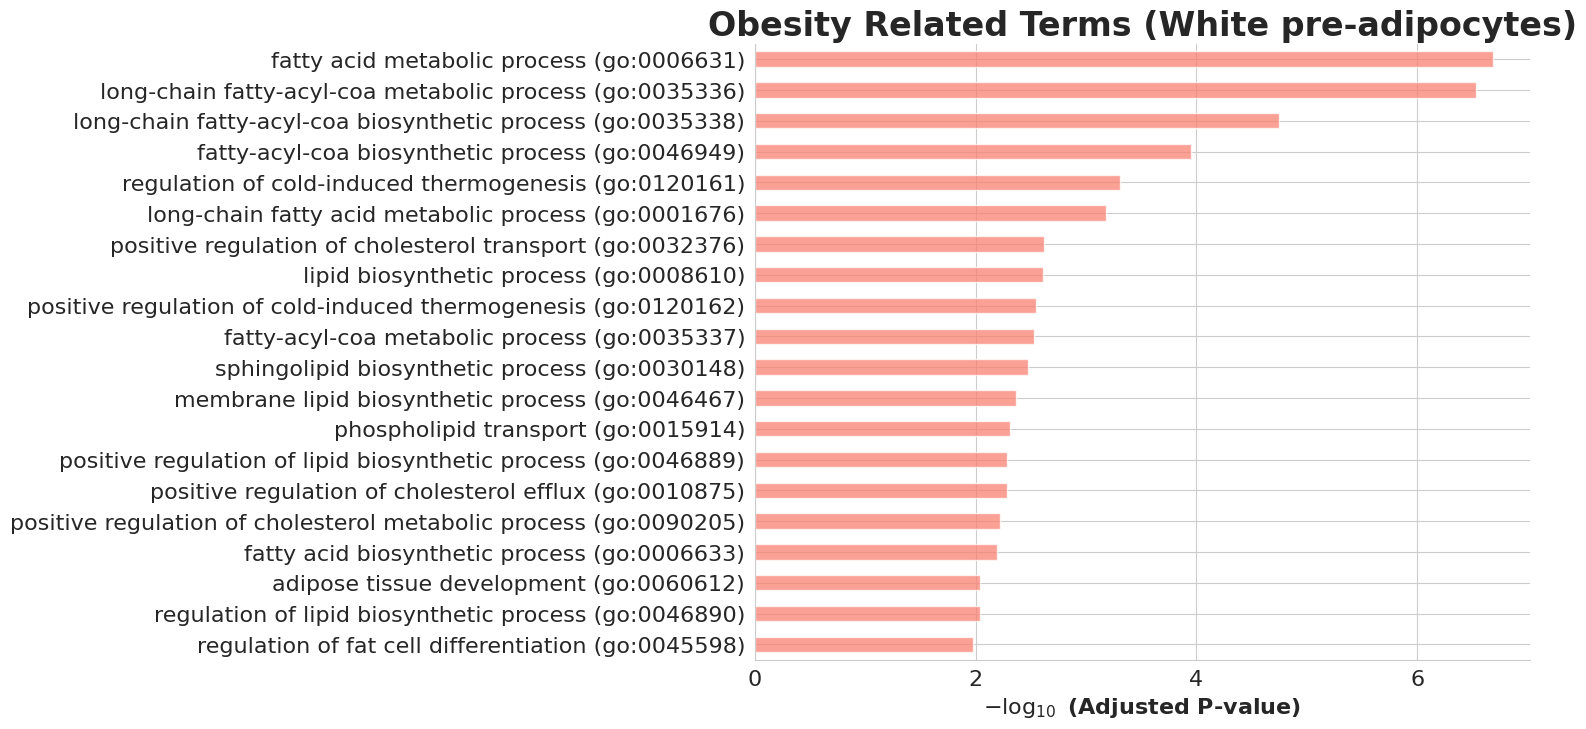

In [86]:
from gseapy import barplot, dotplot

obesity_related_terms = ["lipid", "fatty", "fat", "cholesterol", "adipose", "obesity", "thermo", "fat cell"]
white_pady_obesity_related_enrichr = white_preadpy_irx3_enrichr_df[white_preadpy_irx3_enrichr_df.Term.str.contains("|"
                                                                                                                 .join
                                                                                              (obesity_related_terms))]
barplot(white_pady_obesity_related_enrichr, title="Obesity Related Terms (White pre-adipocytes)", cutoff=0.05, 
        top_term=20, figsize=(10, 8))

In [12]:
import math
irx3_corr_ranked = white_padpy_irx3_sig_corr_df.sort_values(by="corr", ascending=False)
irx5_corr_ranked = white_padpy_irx5_sig_corr_df.sort_values(by="corr", ascending=False)
#Write to file
with open("/mnt/hdd_2/abdu/gtex/white_preadipocytes_abs_corr_genes_irx3.rnk", "w") as f:
    for _, row in irx3_corr_ranked.iterrows():
        if not math.isnan(row['corr']):
            f.write(f"{row['gene']}\t{row['corr']}\n")
with open("/mnt/hdd_2/abdu/gtex/white_preadipocytes_abs_corr_genes_irx5.rnk", "w") as f:
    for _, row in irx5_corr_ranked.iterrows():
        if not math.isnan(row['corr']):
            f.write(f"{row['gene']}\t{row['corr']}\n")

In [60]:
# Gene set overrepresentation
white_padpy_irx3_corrs_df = pd.DataFrame(irx3_corrs)
white_padpy_irx5_corrs_df = pd.DataFrame(irx5_corrs)
white_padpy_irx3_sig_corr_df = white_padpy_irx3_corrs_df[white_padpy_irx3_corrs_df["pval"] < 0.01]
white_padpy_irx3_sig_corr_df = white_padpy_irx5_corrs_df[white_padpy_irx5_corrs_df["pval"] < 0.01]

top_irx3_500_pos_corr = white_padpy_irx3_sig_corr_df.sort_values(by="corr", ascending=False).head(500)
top_irx5_500_pos_corr = white_padpy_irx3_sig_corr_df.sort_values(by="corr", ascending=False).head(500)
top_irx3_500_neg_corr = white_padpy_irx3_sig_corr_df.sort_values(by="corr", ascending=True).head(500)
top_irx5_500_neg_corr = white_padpy_irx3_sig_corr_df.sort_values(by="corr", ascending=True).head(500)

#Write to file
with open("/mnt/hdd_2/abdu/gtex/white_preadipocytes_top_500_pos_corr_genes_irx3.txt", "w") as f:
    for _, row in top_irx3_500_pos_corr.iterrows():
        if not math.isnan(row['corr']):
            f.write(f"{row['gene']}\n")
            
with open("/mnt/hdd_2/abdu/gtex/white_preadipocytes_top_500_pos_corr_genes_irx5.txt", "w") as f:
    for _, row in top_irx5_500_pos_corr.iterrows():
        if not math.isnan(row['corr']):
            f.write(f"{row['gene']}\n")
            
with open("/mnt/hdd_2/abdu/gtex/white_preadipocytes_top_500_neg_corr_genes_irx3.txt", "w") as f:
    for _, row in top_irx3_500_neg_corr.iterrows():
        if not math.isnan(row['corr']):
            f.write(f"{row['gene']}\n")

with open("/mnt/hdd_2/abdu/gtex/white_preadipocytes_top_500_neg_corr_genes_irx5.txt", "w") as f:
    for _, row in top_irx5_500_neg_corr.iterrows():
        if not math.isnan(row['corr']):
            f.write(f"{row['gene']}\n")

### Brown Pre-Adipocytes (CellxGene)

In [77]:
import anndata as ad

brown_pre_adipocytes = ad.read_h5ad("/mnt/hdd_2/abdu/gtex/brown_preadipocytes_sc_exp.h5ad")
brown_pre_adipocytes_df = brown_pre_adipocytes.to_df()
ensembl_id_gene_symbol = {}
gene_symbol_ensembl_id = {}
for gene_id in brown_pre_adipocytes.var.index:
    gene_symbol = brown_pre_adipocytes.var.loc[gene_id, "feature_name"]
    ensembl_id_gene_symbol[gene_id] = gene_symbol
    gene_symbol_ensembl_id[gene_symbol] = gene_id

In [78]:
irx3_id = gene_symbol_ensembl_id["IRX3"]
irx5_id = gene_symbol_ensembl_id["IRX5"]
mean_irx3_expr = brown_pre_adipocytes_df[irx3_id].mean()
mean_irx5_expr = brown_pre_adipocytes_df[irx5_id].mean()
#Num of cells with non-zero expression (percent)
irx3_cells = brown_pre_adipocytes_df[brown_pre_adipocytes_df[irx3_id] > 0.0]
irx5_cells = brown_pre_adipocytes_df[brown_pre_adipocytes_df[irx5_id] > 0.0]
num_irx3_cells = irx3_cells.shape[0]
num_irx5_cells = irx5_cells.shape[0]
print(f"IRX3: Mean expr - {mean_irx3_expr: .3f}\t % of Cells - {num_irx3_cells/brown_pre_adipocytes_df.shape[0]*100:.3f}")
print(f"IRX5: Mean expr - {mean_irx5_expr: .3f}\t % of Cells - {num_irx5_cells/brown_pre_adipocytes_df.shape[0]*100:.3f}")

IRX3: Mean expr -  0.067	 % of Cells - 9.850
IRX5: Mean expr -  0.039	 % of Cells - 6.360


In [79]:
from tqdm import tqdm
brown_irx3_corrs = {"gene": [], "corr": [], "pval": []}
brown_irx5_corrs = {"gene": [], "corr": [], "pval": []}
irx3_id = gene_symbol_ensembl_id["IRX3"]
irx5_id = gene_symbol_ensembl_id["IRX5"]
# irx3_expr = brown_pre_adipocytes_df.loc[irx3_cells.index, irx3_id].values
# irx5_expr = brown_pre_adipocytes_df.loc[irx5_cells.index, irx5_id].values
irx3_expr = brown_pre_adipocytes_df[irx3_id].values
irx5_expr = brown_pre_adipocytes_df[irx5_id].values
for gene_id in tqdm(brown_pre_adipocytes_df.columns):
    try:
        # gene_expr_val = brown_pre_adipocytes_df.loc[irx3_cells.index, gene_id].values
        gene_expr_val = brown_pre_adipocytes_df[gene_id].values
        if len(gene_expr_val.shape) > 1: # for duplicate gene ids take the first one
            gene_expr_val = gene_expr_val[0]
        if gene_id != irx3_id:
            irx3_corr, irx3_pval = stats.pearsonr(gene_expr_val, irx3_expr)
            brown_irx3_corrs["gene"].append(ensembl_id_gene_symbol[gene_id])
            brown_irx3_corrs["corr"].append(irx3_corr)
            brown_irx3_corrs["pval"].append(irx3_pval)
        if gene_id != irx5_id:
            # gene_expr_val = brown_pre_adipocytes_df.loc[irx5_cells.index, gene_id].values
            irx5_corr, irx5_pval = stats.pearsonr(gene_expr_val, irx5_expr)
            brown_irx5_corrs["gene"].append(ensembl_id_gene_symbol[gene_id])
            brown_irx5_corrs["corr"].append(irx5_corr)
            brown_irx5_corrs["pval"].append(irx5_pval)
    except Exception as e:
        print(f"Exception: {e}")
        print(f"Gene id: {gene_id}")
        print(f"Gene expr val: {len(gene_expr_val)}")
        print(f"IRX3 expr val: {len(irx3_expr)}")
        print(f"IRX5 expr val: {len(irx5_expr)}")

  0%|                                                                                                                    | 0/33234 [00:00<?, ?it/s]/home/abdu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 33234/33234 [01:15<00:00, 437.35it/s]


In [80]:
brown_padpy_irx3_corrs_df = pd.DataFrame(brown_irx3_corrs)
brown_padpy_irx5_corrs_df = pd.DataFrame(brown_irx5_corrs)
brown_padpy_irx3_abs_corrs_df = brown_padpy_irx3_corrs_df.copy()
brown_padpy_irx3_abs_corrs_df["corr"] = brown_padpy_irx3_corrs_df["corr"].apply(lambda x: abs(x))
brown_padpy_irx5_abs_corrs_df = brown_padpy_irx5_corrs_df.copy()
brown_padpy_irx5_abs_corrs_df["corr"] = brown_padpy_irx5_corrs_df["corr"].apply(lambda x: abs(x))
brown_padpy_irx3_sig_corr_df = brown_padpy_irx3_abs_corrs_df[brown_padpy_irx3_abs_corrs_df["pval"] < 0.05]
brown_padpy_irx5_sig_corr_df = brown_padpy_irx5_abs_corrs_df[brown_padpy_irx5_abs_corrs_df["pval"] < 0.05]
print(f"Num of genes with sig corr with IRX3: {brown_padpy_irx3_sig_corr_df.shape[0]}")
print(f"Num of genes with sig corr with IRX5: {brown_padpy_irx5_sig_corr_df.shape[0]}")

Num of genes with sig corr with IRX3: 5925
Num of genes with sig corr with IRX5: 3397


#### Gene Set Overrepresentation with GSEAPY

##### IRX3

In [81]:
import gseapy as gp

brown_padyp_irx3_corr_top_500 = brown_padpy_irx3_sig_corr_df.sort_values(by="corr", ascending=False).head(500)
brown_padyp_irx3_corr_top_500_genes = list(brown_padyp_irx3_corr_top_500["gene"].values)
brown_padyp_irx3_corr_background_genes = list(brown_padpy_irx3_abs_corrs_df["gene"].values)
library = "GO_Biological_Process_2023"
organism = "Human"

brown_padyp_irx3_enrichr = gp.enrichr(gene_list=brown_padyp_irx3_corr_top_500_genes,
                          gene_sets=library,
                          background=brown_padyp_irx3_corr_background_genes,
                          organism=organism,
                          outdir=None)
brown_padyp_irx3_enrichr_df = brown_padyp_irx3_enrichr.results
brown_padyp_irx3_enrichr_df["Term"] = brown_padyp_irx3_enrichr_df["Term"].apply(lambda x: x.lower())

In [82]:
brown_padyp_irx3_enrichr_df[(brown_padyp_irx3_enrichr_df.Term.str.contains("thermo"))]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
20,GO_Biological_Process_2023,regulation of cold-induced thermogenesis (go:0...,6.391558e-10,8.184238e-08,0,0,8.420713,178.273841,DYNC1H1;CEBPB;ACSL1;APLP2;ADIPOQ;NPR3;PLCL2;NR...
34,GO_Biological_Process_2023,positive regulation of cold-induced thermogene...,2.971176e-08,2.282712e-06,0,0,9.334827,161.788626,DYNC1H1;CEBPB;FABP4;ACSL1;SCD;APLP2;ADIPOQ;GNA...
272,GO_Biological_Process_2023,negative regulation of cold-induced thermogene...,5.058897e-04,4.955889e-03,0,0,8.467754,64.263414,NPR3;ADIPOQ;PLCL2;ID1;NR1H3


In [83]:
brown_padyp_irx3_enrichr_df.shape

(2689, 9)

In [84]:
subset_genes = brown_padyp_irx3_enrichr_df[(brown_padyp_irx3_enrichr_df.Term.str.contains("thermo"))]["Genes"]\
.loc[272].split(";")
brown_padpy_irx3_corrs_df[brown_padpy_irx3_corrs_df["gene"].isin(subset_genes)]

,gene,corr,pval
5550,PLCL2,0.073238,1.661407e-10
6947,ADIPOQ,-0.112175,1.074920e-22
8674,NPR3,0.073136,1.761032e-10
17442,NR1H3,-0.096037,4.984685e-17
29225,ID1,0.079511,3.956017e-12


<Axes: title={'center': 'Obesity Related Terms (Brown pre-adipocytes)'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

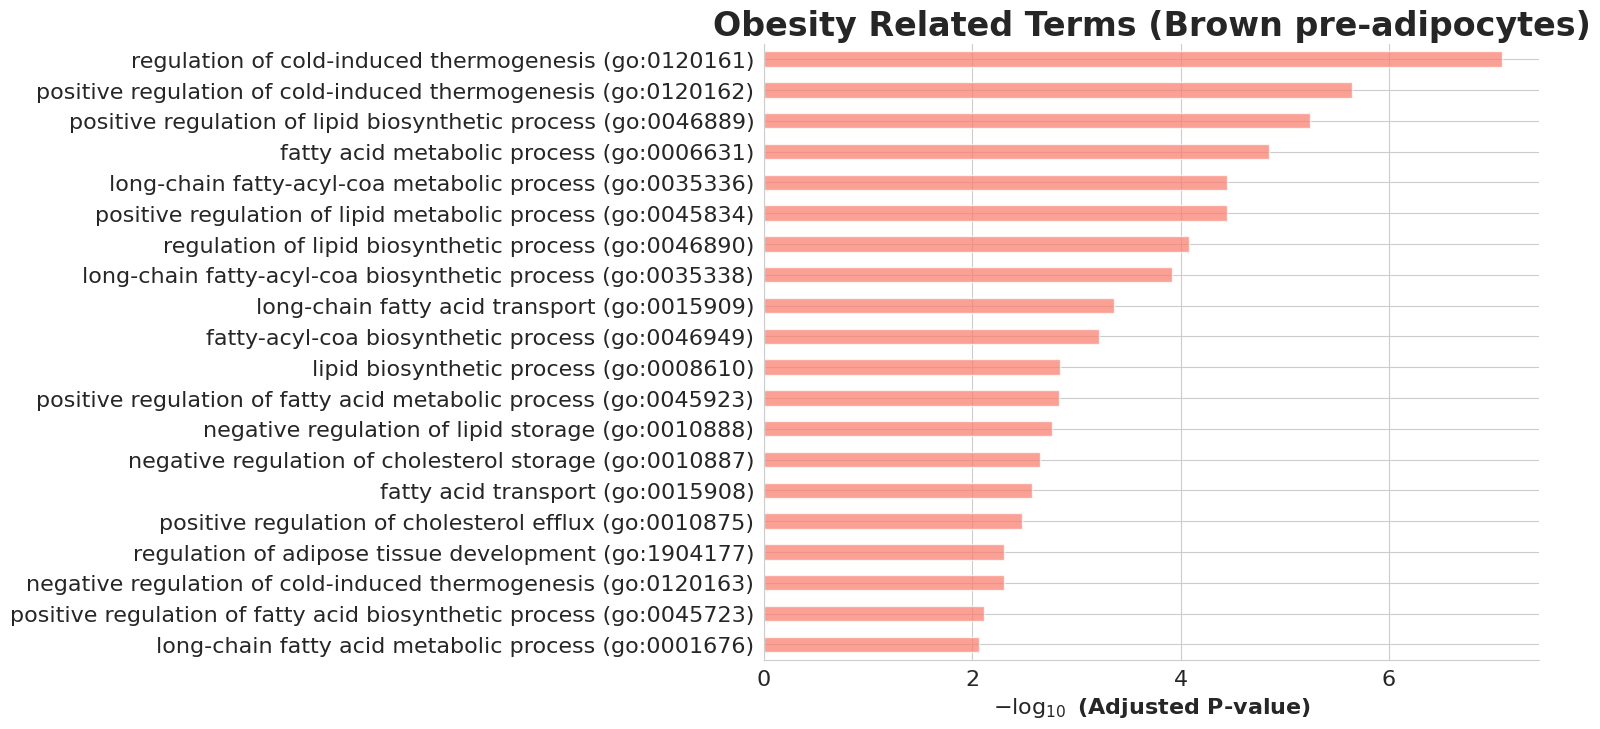

In [87]:
from gseapy import barplot, dotplot

obesity_related_terms = ["lipid", "fatty", "fat", "cholesterol", "adipose", "obesity", "thermo", "fat cell"]
brown_pady_obesity_related_enrichr = brown_padyp_irx3_enrichr_df[brown_padyp_irx3_enrichr_df.Term.str.contains("|".join
                                                                                              (obesity_related_terms))]
barplot(brown_pady_obesity_related_enrichr, title="Obesity Related Terms (Brown pre-adipocytes)", cutoff=0.05, 
        top_term=20, figsize=(10, 8))

In [23]:
import math

#keep only those corr > 0.2 or < -0.2
# brown_top_irx3_corr = brown_padpy_irx3_sig_corr_df[(brown_padpy_irx3_sig_corr_df["corr"] > 0.2) | 
#                                              (brown_padpy_irx3_sig_corr_df["corr"] < -0.2)].sort_values(by="corr", ascending=False)
# brown_top_irx5_corr = brown_padpy_irx5_sig_corr_df[(brown_padpy_irx5_sig_corr_df["corr"] > 0.2) | 
#                                              (brown_padpy_irx5_sig_corr_df["corr"] < -0.2)].sort_values(by="corr", ascending=False)
brown_irx3_corr_ranked = brown_padpy_irx3_sig_corr_df.sort_values(by="corr", ascending=False)
brown_irx5_corr_ranked = brown_padpy_irx5_sig_corr_df.sort_values(by="corr", ascending=False)
#Write to file
with open("/mnt/hdd_2/abdu/gtex/brown_preadipocytes_abs_corr_genes_irx3.rnk", "w") as f:
    for _, row in brown_irx3_corr_ranked.iterrows():
        if not math.isnan(row['corr']):
            f.write(f"{row['gene']}\t{row['corr']}\n")
with open("/mnt/hdd_2/abdu/gtex/brown_preadipocytes_abs_corr_genes_irx5.rnk", "w") as f:
    for _, row in brown_irx5_corr_ranked.iterrows():
        if not math.isnan(row['corr']):
            f.write(f"{row['gene']}\t{row['corr']}\n")